In [2]:
import pandas as pd
import numpy as np

In [8]:
#haeders = [["semi", "semi", "semi" , "panas" , "panas", "panas" , "gugur", "gugur", "gugur",  "dingin", "dingin", "dingin"],
          #["apr" , "mei", "jun", "jul", "agu", "sep", "okt", "nov", "des", "jan", "feb", "mar"]]

headers = pd.MultiIndex.from_product([["semi", "panas", "gugur", "dingin"],
                                      ["1", "2", "3"]])    
data = [[8, 3, 2, 3, 2, 3, 3, 3, 5, 3, 22, 11]]
pd.DataFrame(data, columns = headers)

semi       panas       gugur       dingin        
     1  2  3     1  2  3     1  2  3      1   2   3
0    8  3  2     3  2  3     3  3  5      3  22  11

In [17]:
haeders = pd.MultiIndex.from_arrays(
        [
            ["apr" , "mei", "jun", "jul", "agu", "sep", "okt", "nov", "des", "jan", "feb", "mar"],
            ["semi", "semi", "semi" , "panas" , "panas", "panas" , "gugur", "gugur", "gugur",  "dingin", "dingin", "dingin"]
        ])   
data = [[8, 3, 2, 3, 2, 3, 3, 3, 5, 3, 22, 11]]
pd.DataFrame(data, columns = headers)

ValueError: 3 columns passed, passed data had 12 columns

In [12]:
arrays = [[1,1,2,2],['red','blue','red','blue']]
pd.MultiIndex.from_arrays(arrays)

MultiIndex([(1,  'red'),
            (1, 'blue'),
            (2,  'red'),
            (2, 'blue')],
           )

In [21]:
headers = pd.MultiIndex.from_arrays(
        [
            ["apr","mei","jun"], # anggota 1
            ["semi","panas","gugur"] # anggota 2
        ])
data = [
        [8,3,2], # baris 1
        [3,2,78] # baris 2
        ]
pd.DataFrame(data, columns = headers)

,apr,mei,jun
,semi,panas,gugur
0,8,3,2
1,3,2,78


In [24]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Andri\anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         159 KB  anaconda
    conda-4.10.0               |   py38haa95532_0         2.9 MB
    openssl-1.1.1h             |       he774522_0         5.8 MB  anaconda
    xlrd-1.2.0                 |             py_0         108 KB  anaconda
    ------------------------------------------------------------
                                           Total:         8.9 MB

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.10.0-py38haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  openssl   

In [30]:
df_can = pd.read_excel ('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name = 'Canada by Citizenship',
                       skiprows = range(20),
                       skipfooter = 2)

#print ('Data read into a pandas dataframe!')


In [31]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [32]:
df_can.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis = 1, inplace = True)

In [33]:
df_can.rename(columns = {"OdName" : "Country", "AreaName" : "Continent", "RegName" : "Region"}, inplace = True)

In [34]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [35]:
df_can.sum(axis = 1)

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Length: 195, dtype: int64

In [46]:
df_can["Total"] = df_can.sum(axis = 1)
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,31398
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,194292
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,5970
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,3354


In [38]:
df = pd.DataFrame(data = [[3,4,1],[4,4,40]], columns=['jakarta', 'bali', 'padang'])
df

,jakarta,bali,padang
0,3,4,1
1,4,4,40


In [47]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [48]:
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [40]:
df

,jakarta,bali,padang,makassar
0,3,4,1,7
1,4,4,40,9


In [39]:
df['makassar'] = [7,9]

In [44]:
df = df.append({'jakarta' : 8, 'bali': 8, 'bandung': 67, 'makassar': 4}, ignore_index = True)
df

,jakarta,bali,padang,makassar,bandung
0,3.0,4.0,1.0,7.0,NaN
1,4.0,4.0,40.0,9.0,NaN
2,8.0,8.0,NaN,4.0,67.0
3,8.0,8.0,NaN,4.0,67.0


In [52]:
df_can.set_index('Country', inplace = True)
df_can

KeyError: "None of ['Country'] are in the columns"

In [55]:
df_can.append(df_can.loc[:, :].sum(), ignore_index = True)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
1,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
2,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
3,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
4,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
192,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,5970
193,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,3354
194,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,...,615,454,663,611,508,494,434,437,407,17196


In [61]:
df2 = df_can.append(df_can.loc[:, :].sum(), ignore_index = True)

In [62]:
df2.tail()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
191,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
192,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,5970
193,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,3354
194,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,...,615,454,663,611,508,494,434,437,407,17196
195,AsiaEuropeAfricaOceaniaEuropeAfricaLatin Ameri...,Southern AsiaSouthern EuropeNorthern AfricaPol...,Developing regionsDeveloped regionsDeveloping ...,99137,110563,104271,75550,73417,69978,86048,...,257457,247057,232405,243047,248768,276956,246194,256222,257537,12818306


In [65]:
df_can.columns = list(map(str, df_can.columns))

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [67]:
df_can.index.values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 

In [70]:
df_can.columns = list(map(str, df_can.columns))

In [71]:
years = list (map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [72]:
japan = df_can.loc["Japan", years]
japan

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

<AxesSubplot:>

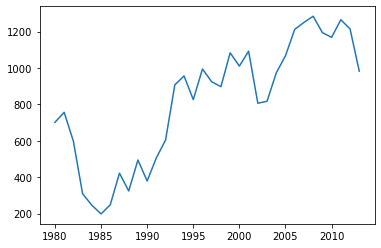

In [73]:
japan.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

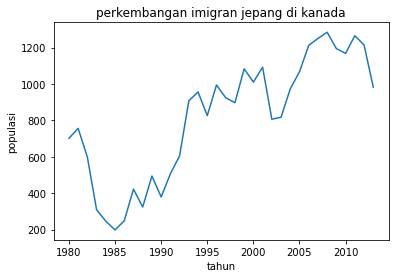

In [78]:

japan.plot (kind='line')
plt.xlabel("tahun")
plt.ylabel("populasi")
plt.title("perkembangan imigran jepang di kanada")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

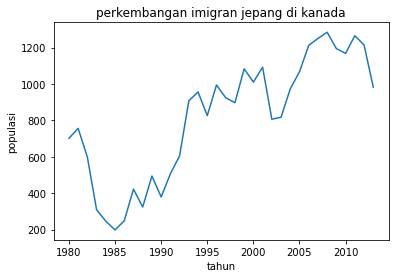

In [79]:
japan.index = japan.index.map(int)
japan.plot (kind='line')
plt.xlabel("tahun")
plt.ylabel("populasi")
plt.title("perkembangan imigran jepang di kanada")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

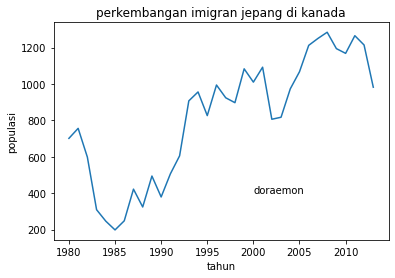

In [82]:
japan.index = japan.index.map(int)
japan.plot (kind='line')
plt.xlabel("tahun")
plt.ylabel("populasi")
plt.title("perkembangan imigran jepang di kanada")
plt.text(2000,400, 'doraemon')
plt.show

In [92]:
japan_denmark = df_can.loc[["Japan", "Denmark"], years]
japan_denmark

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Japan,701,756,598,309,246,198,248,422,324,494,...,973,1067,1212,1250,1284,1194,1168,1265,1214,982
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81


In [94]:
jd = japan_denmark.transpose()
jd

Country,Japan,Denmark
1980,701,272
1981,756,293
1982,598,299
1983,309,106
1984,246,93
1985,198,73
1986,248,93
1987,422,109
1988,324,129
1989,494,129


<function matplotlib.pyplot.show(close=None, block=None)>

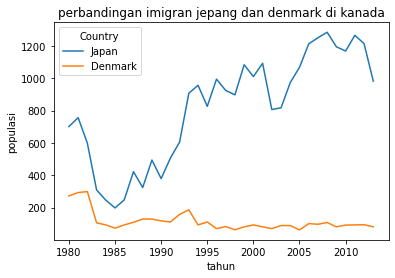

In [96]:
jd.plot()
plt.xlabel("tahun")
plt.ylabel("populasi")
plt.title("perbandingan imigran jepang dan denmark di kanada")
plt.show

In [97]:
jd_pie = jd.sum()
jd_pie

Country
Japan      27707
Denmark     3901
dtype: int64

<AxesSubplot:ylabel='None'>

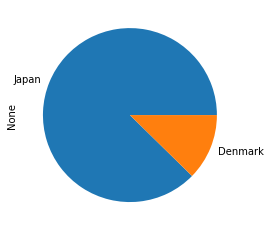

In [98]:
jd_pie.plot(kind="pie")

In [99]:
jd2 = jd.copy()
jd2["Year"] = jd2.index
jd2

Country,Japan,Denmark,Year
1980,701,272,1980
1981,756,293,1981
1982,598,299,1982
1983,309,106,1983
1984,246,93,1984
1985,198,73,1985
1986,248,93,1986
1987,422,109,1987
1988,324,129,1988
1989,494,129,1989


<AxesSubplot:xlabel='Year', ylabel='Japan'>

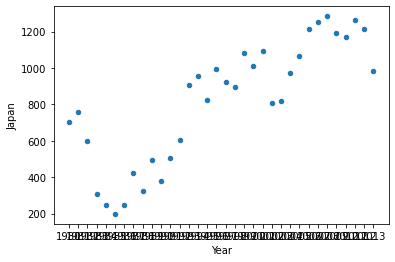

In [103]:
jd2.plot(kind = 'scatter', x = 'Year', y = 'Japan')

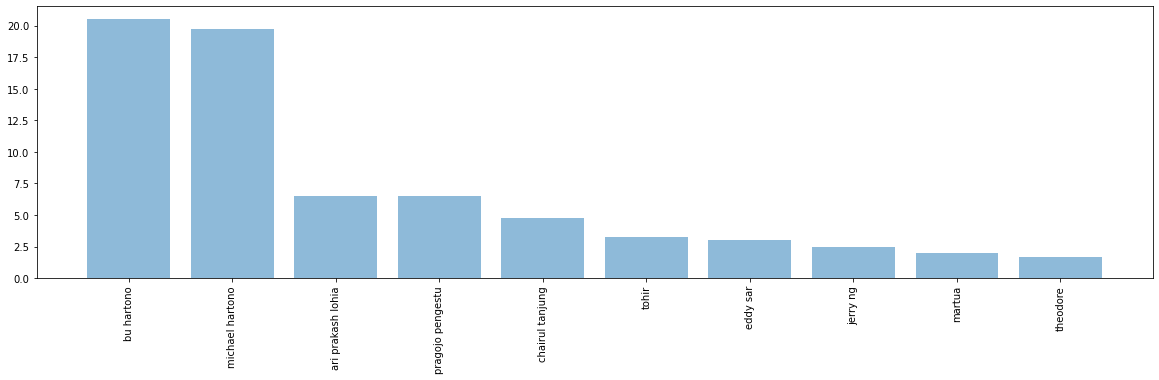

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#nama = ('bu hartono', 'michael hartono', "ari prakash lohia","pragojo pengestu",
#        "chairul tanjung", "tohir","eddy sar","jerry ng", "martua","theodore"   )
#y_pos = np.arange(len(nama))
#harta = [2,4,6,8,10,12,14,16,18,20,22 ]

orang_terkaya = {
    "bu hartono": 20.5,
    "michael hartono": 19.7,
    "ari prakash lohia": 6.5,
    "pragojo pengestu": 6.5,
    "chairul tanjung": 4.8,
    "tohir" : 3.3,
    "eddy sar": 3,
    "jerry ng": 2.5,
    "martua": 2,
    "theodore" : 1.7
}
nama_orang_terkaya = orang_terkaya.keys()
y_pos = np.arange(len(nama_orang_terkaya))
kekayaan = orang_terkaya.values()

#plt.figure(figsize=(20,5))
#plt.bar(y_pos, kekayaan, align = 'center', alpha = 0.5)
#plt.xticks(y_pos, nama_orang_terkaya)


plt.figure(figsize=(20,5))
plt.bar(y_pos,kekayaan,align='center',alpha = 0.5)
plt.xticks(y_pos,nama_orang_terkaya)
plt.xticks(rotation=90)
plt.show()

plt.show()


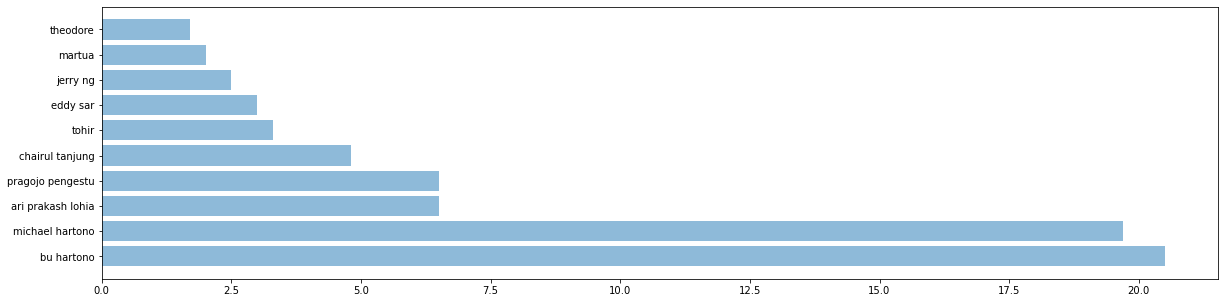

In [24]:
import numpy as np
import matplotlib.pyplot as plt

orang_terkaya = {
    "bu hartono": 20.5,
    "michael hartono": 19.7,
    "ari prakash lohia": 6.5,
    "pragojo pengestu": 6.5,
    "chairul tanjung": 4.8,
    "tohir" : 3.3,
    "eddy sar": 3,
    "jerry ng": 2.5,
    "martua": 2,
    "theodore" : 1.7
}
harta_orang_terkaya = orang_terkaya.values()
y_pos = np.arange(len(harta_orang_terkaya))
nama= orang_terkaya.keys()

plt.figure(figsize=(20,5))
plt.barh( y_pos, harta_orang_terkaya, align = 'center', alpha = 0.5)
plt.yticks(y_pos, nama)


plt.show()

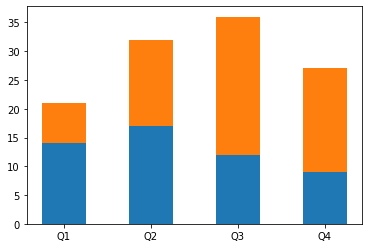

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#data dua tim
quarter = ['Q1', 'Q2', 'Q3', 'Q4']
tim_A = [14,17,12,9]
tim_B = [7,15,24,18]

N = 4
barWidth = .5
xloc = np.arange(N)

p1 = plt.bar(xloc, tim_A, width = barWidth)
p2 = plt.bar(xloc, tim_B, bottom = tim_A, width = barWidth )
plt.xticks(xloc,quarter)
plt.show()

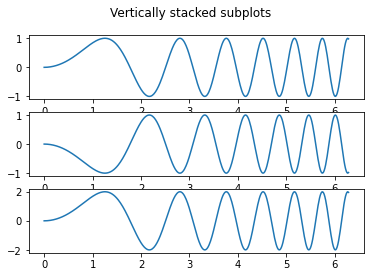

In [53]:

fig, axs = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x,y)
axs[1].plot(x,-y)
axs[2].plot(x, 2 * y)

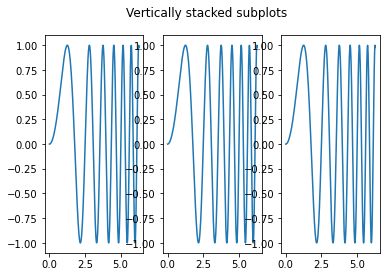

In [64]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)